In [1]:
import pandas as pd; # type: ignore
import numpy as np; # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU # type: ignore
import pickle
from keras.models import load_model # type: ignore

In [2]:
df=pd.read_csv("D:/Final Project/Retail-Sales-Markdown-Prediction-Using-ANN-with-TensorFlow--AWS-Deployment/retail_sale_predict.csv")
df

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Day,Week,Month,Year,lag_1_sales,lag_1_markdown,markdown_holiday_interaction,markdown_impacted,days_until_holiday,pre_holiday_sales_spike
0,1,1,151315,1,24924.50,0,42.31,2.572,0.00,0.00,...,5,5,2,2010,0.00,0.00,0.0,0.000000e+00,7.0,1
1,1,1,151315,1,46039.49,1,38.51,2.548,0.00,0.00,...,12,6,2,2010,24924.50,0.00,0.0,0.000000e+00,0.0,1
2,1,1,151315,1,41595.55,0,39.93,2.514,0.00,0.00,...,19,7,2,2010,46039.49,0.00,0.0,0.000000e+00,203.0,0
3,1,1,151315,1,19403.54,0,46.63,2.561,0.00,0.00,...,26,8,2,2010,41595.55,0.00,0.0,0.000000e+00,196.0,0
4,1,1,151315,1,21827.90,0,46.50,2.625,0.00,0.00,...,5,9,3,2010,19403.54,0.00,0.0,0.000000e+00,189.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,508.37,0,64.88,3.997,4556.61,20.64,...,28,39,9,2012,467.30,19654.50,0.0,4.813252e+06,0.0,0
421566,45,2,118221,98,628.10,0,64.89,3.985,5046.74,0.00,...,5,40,10,2012,508.37,9468.01,0.0,6.066818e+06,0.0,0
421567,45,2,118221,98,1061.02,0,54.47,4.000,1956.28,0.00,...,12,41,10,2012,628.10,9659.00,0.0,6.953957e+06,0.0,0
421568,45,2,118221,98,760.01,0,56.47,3.969,2004.02,0.00,...,19,42,10,2012,1061.02,6554.03,0.0,3.026679e+06,0.0,0


In [3]:
x=df.drop("Weekly_Sales",axis=1)
y=df["Weekly_Sales"]

In [4]:
x

,Store,Type,Size,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Day,Week,Month,Year,lag_1_sales,lag_1_markdown,markdown_holiday_interaction,markdown_impacted,days_until_holiday,pre_holiday_sales_spike
0,1,1,151315,1,0,42.31,2.572,0.00,0.00,0.00,...,5,5,2,2010,0.00,0.00,0.0,0.000000e+00,7.0,1
1,1,1,151315,1,1,38.51,2.548,0.00,0.00,0.00,...,12,6,2,2010,24924.50,0.00,0.0,0.000000e+00,0.0,1
2,1,1,151315,1,0,39.93,2.514,0.00,0.00,0.00,...,19,7,2,2010,46039.49,0.00,0.0,0.000000e+00,203.0,0
3,1,1,151315,1,0,46.63,2.561,0.00,0.00,0.00,...,26,8,2,2010,41595.55,0.00,0.0,0.000000e+00,196.0,0
4,1,1,151315,1,0,46.50,2.625,0.00,0.00,0.00,...,5,9,3,2010,19403.54,0.00,0.0,0.000000e+00,189.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,0,64.88,3.997,4556.61,20.64,1.50,...,28,39,9,2012,467.30,19654.50,0.0,4.813252e+06,0.0,0
421566,45,2,118221,98,0,64.89,3.985,5046.74,0.00,18.82,...,5,40,10,2012,508.37,9468.01,0.0,6.066818e+06,0.0,0
421567,45,2,118221,98,0,54.47,4.000,1956.28,0.00,7.89,...,12,41,10,2012,628.10,9659.00,0.0,6.953957e+06,0.0,0
421568,45,2,118221,98,0,56.47,3.969,2004.02,0.00,3.18,...,19,42,10,2012,1061.02,6554.03,0.0,3.026679e+06,0.0,0


In [5]:
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [6]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new

array([[-1.65819926, -0.8853067 ,  0.23920895, ..., -0.21799271,
        -0.06541676,  1.69654154],
       [-1.65819926, -0.8853067 ,  0.23920895, ..., -0.21799271,
        -0.09512708,  1.69654154],
       [-1.65819926, -0.8853067 ,  0.23920895, ..., -0.21799271,
         0.76647222, -0.58943443],
       ...,
       [ 1.78325781,  0.61543819, -0.30348902, ..., -0.20621171,
        -0.09512708, -0.58943443],
       [ 1.78325781,  0.61543819, -0.30348902, ..., -0.21286508,
        -0.09512708, -0.58943443],
       [ 1.78325781,  0.61543819, -0.30348902, ..., -0.20842038,
        -0.09512708, -0.58943443]])

In [7]:
x_new_df=pd.DataFrame(x_new,columns=x.columns)
x_new_df

,Store,Type,Size,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Day,Week,Month,Year,lag_1_sales,lag_1_markdown,markdown_holiday_interaction,markdown_impacted,days_until_holiday,pre_holiday_sales_spike
0,-1.658199,-0.885307,0.239209,-1.418742,-0.275106,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,...,-1.219293,-1.471661,-1.371945,-1.215487,-0.703674,-0.453126,-0.135351,-0.217993,-0.065417,1.696542
1,-1.658199,-0.885307,0.239209,-1.418742,3.634961,-1.169783,-1.773177,-0.427943,-0.173069,-0.084662,...,-0.419617,-1.400999,-1.371945,-1.215487,0.393782,-0.453126,-0.135351,-0.217993,-0.095127,1.696542
2,-1.658199,-0.885307,0.239209,-1.418742,-0.275106,-1.092810,-1.847330,-0.427943,-0.173069,-0.084662,...,0.380060,-1.330337,-1.371945,-1.215487,1.323501,-0.453126,-0.135351,-0.217993,0.766472,-0.589434
3,-1.658199,-0.885307,0.239209,-1.418742,-0.275106,-0.729625,-1.744825,-0.427943,-0.173069,-0.084662,...,1.179736,-1.259675,-1.371945,-1.215487,1.127829,-0.453126,-0.135351,-0.217993,0.736762,-0.589434
4,-1.658199,-0.885307,0.239209,-1.418742,-0.275106,-0.736672,-1.605243,-0.427943,-0.173069,-0.084662,...,-1.219293,-1.189013,-1.063609,-1.215487,0.150687,-0.453126,-0.135351,-0.217993,0.707052,-0.589434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.783258,0.615438,-0.303489,1.762418,-0.275106,0.259647,1.387032,0.324919,-0.169009,-0.084391,...,1.408215,0.930848,0.786408,1.294317,-0.683098,0.879299,-0.135351,-0.209838,-0.095127,-0.589434
421566,1.783258,0.615438,-0.303489,1.762418,-0.275106,0.260189,1.360860,0.405901,-0.173069,-0.081259,...,-1.219293,1.001510,1.094744,1.294317,-0.681290,0.188733,-0.135351,-0.207715,-0.095127,-0.589434
421567,1.783258,0.615438,-0.303489,1.762418,-0.275106,-0.304645,1.393575,-0.104718,-0.173069,-0.083235,...,-0.419617,1.072172,1.094744,1.294317,-0.676018,0.201680,-0.135351,-0.206212,-0.095127,-0.589434
421568,1.783258,0.615438,-0.303489,1.762418,-0.275106,-0.196231,1.325965,-0.096830,-0.173069,-0.084087,...,0.380060,1.142834,1.094744,1.294317,-0.656956,-0.008813,-0.135351,-0.212865,-0.095127,-0.589434


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y, test_size=0.2, random_state=42)

c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 130)            │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        13,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,771 (128.01 KB)

 Trainable params: 32,771 (128.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/28
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 101181648.0000 - mean_absolute_error: 4058.4639 - mean_squared_error: 101181648.0000 - root_mean_squared_error: 9460.6426 - val_loss: 35892328.0000 - val_mean_absolute_error: 2554.9263 - val_mean_squared_error: 35892328.0000 - val_root_mean_squared_error: 5991.0205
Epoch 2/28
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 35276804.0000 - mean_absolute_error: 2450.8972 - mean_squared_error: 35276804.0000 - root_mean_squared_error: 5932.7070 - val_loss: 32036438.0000 - val_mean_absolute_error: 2320.0234 - val_mean_squared_error: 32036438.0000 - val_root_mean_squared_error: 5660.0742
Epoch 3/28
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 29705592.0000 - mean_absolute_error: 2359.4214 - mean_squared_error: 29705592.0000 - root_mean_squared_error: 5446.7393 - val_loss: 29045746.0000 - val_mean_absolute_error: 2084.1509 - val_mean_squared_error: 29045746.0000 - val_root_mean_squared_error: 5389.4106
Epoch 4/28
8432/8

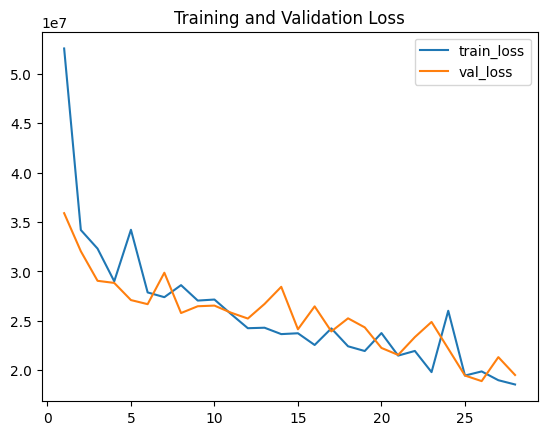

In [9]:
model=Sequential()

model.add(Dense(130,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model.add(Dense(100,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model.add(Dense(80,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model.add(Dense(60,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model.add(Dense(40,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model.add(Dense(20,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01)))#layer-6
model.add(Dense(10,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01)))#layer-6

model.add(Dense(1)) #output layer

model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error','root_mean_squared_error'])

model.summary()

result=model.fit(x_train,y_train,epochs=28,validation_split=0.2,batch_size=32)

result_df=pd.DataFrame(result.history)

plt.plot(range(1,29),result_df['loss'],label="train_loss")
plt.plot(range(1,29),result_df['val_loss'],label="val_loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,921 (73.91 KB)

 Trainable params: 18,921 (73.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/26
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 114189280.0000 - mean_absolute_error: 4881.6719 - mean_squared_error: 114189280.0000 - root_mean_squared_error: 10178.0156 - val_loss: 37793744.0000 - val_mean_absolute_error: 2212.9597 - val_mean_squared_error: 37793744.0000 - val_root_mean_squared_error: 6147.6616
Epoch 2/26
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 43978476.0000 - mean_absolute_error: 2984.5154 - mean_squared_error: 43978476.0000 - root_mean_squared_error: 6629.1768 - val_loss: 36998924.0000 - val_mean_absolute_error: 2269.0461 - val_mean_squared_error: 36998924.0000 - val_root_mean_squared_error: 6082.6743
Epoch 3/26
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 38871168.0000 - mean_absolute_error: 2830.1050 - mean_squared_error: 38871168.0000 - root_mean_squared_error: 6232.1045 - val_loss: 41354688.0000 - val_mean_absolute_error: 2674.0688 - val_mean_squared_error: 41354688.0000 - val_root_mean_squared_error: 6430.7612
Epoch 4/26
8432/

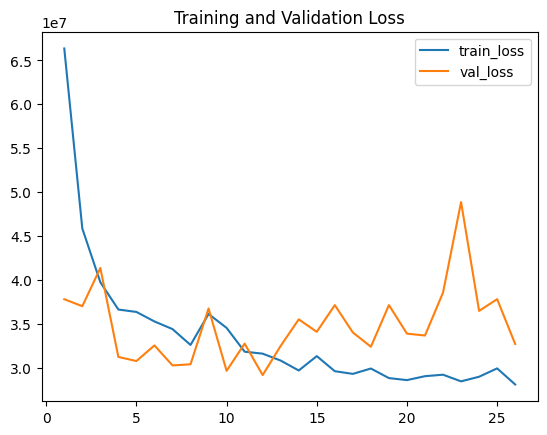

In [12]:
model_2=Sequential()

model_2.add(Dense(100,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model_2.add(Dropout(0.1))
model_2.add(Dense(80,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model_2.add(Dense(60,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model_2.add(Dropout(0.1))
model_2.add(Dense(40,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model_2.add(Dropout(0.1))
model_2.add(Dense(20,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model_2.add(Dense(10,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5

model_2.add(Dense(1)) #output layer

model_2.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error','root_mean_squared_error'])

model_2.summary()

result_2=model_2.fit(x_train,y_train,epochs=26,validation_split=0.2,batch_size=32)

result1_df2=pd.DataFrame(result_2.history)

plt.plot(range(1,27),result1_df2['loss'],label="train_loss")
plt.plot(range(1,27),result1_df2['val_loss'],label="val_loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,721 (73.13 KB)

 Trainable params: 18,721 (73.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/24
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 112808336.0000 - mean_absolute_error: 4427.4507 - mean_squared_error: 112808336.0000 - root_mean_squared_error: 9977.3096 - val_loss: 36616556.0000 - val_mean_absolute_error: 2333.2537 - val_mean_squared_error: 36616556.0000 - val_root_mean_squared_error: 6051.1616
Epoch 2/24
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 34218524.0000 - mean_absolute_error: 2334.7649 - mean_squared_error: 34218524.0000 - root_mean_squared_error: 5844.3965 - val_loss: 33766440.0000 - val_mean_absolute_error: 2098.5588 - val_mean_squared_error: 33766440.0000 - val_root_mean_squared_error: 5810.8896
Epoch 3/24
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 30530630.0000 - mean_absolute_error: 2204.4126 - mean_squared_error: 30530630.0000 - root_mean_squared_error: 5520.4819 - val_loss: 31582504.0000 - val_mean_absolute_error: 2170.0388 - val_mean_squared_error: 31582504.0000 - val_root_mean_squared_error: 5619.8315
Epoch 4/24
8432/8

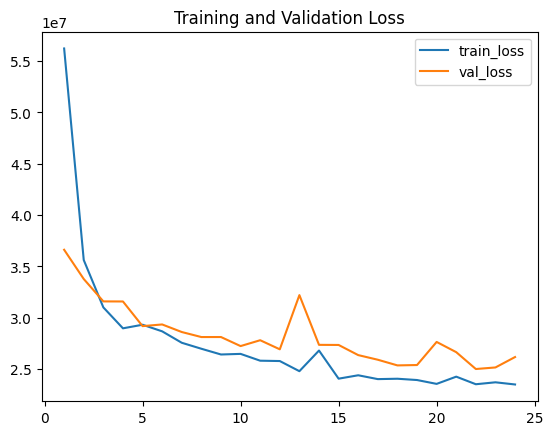

In [13]:
model_3=Sequential()

model_3.add(Dense(100,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model_3.add(Dense(80,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model_3.add(Dense(60,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model_3.add(Dense(40,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model_3.add(Dense(20,input_shape=(x_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model_3.add(Dense(1)) #output layer

model_3.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error','root_mean_squared_error'])

model_3.summary()

result_3=model_3.fit(x_train,y_train,epochs=24,validation_split=0.2,batch_size=32)

result2_df3=pd.DataFrame(result_3.history)

plt.plot(range(1,25),result2_df3['loss'],label="train_loss")
plt.plot(range(1,25),result2_df3['val_loss'],label="val_loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [10]:
#Prediction
y_pred=model.predict(x_test)
#Evaluation
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test,y_pred)
#print the evaluation metrics
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2: {R2}")

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
MAE: 1905.7796331165748
MSE: 19051747.421290915
RMSE: 4364.830743716291
R2: 0.9634653745241839


In [15]:
#Prediction
y_pred=model_2.predict(x_test)
#Evaluation
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test,y_pred)
#print the evaluation metrics
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2: {R2}")

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step
MAE: 2478.6532621443494
MSE: 30389485.80434696
RMSE: 5512.665943474804
R2: 0.9417235354997575


In [16]:
#Prediction
y_pred=model_3.predict(x_test)
#Evaluation
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test,y_pred)
#print the evaluation metrics
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2: {R2}")

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step
MAE: 1796.130743572463
MSE: 23516838.225015018
RMSE: 4849.4162767301195
R2: 0.9549028832932079


In [11]:
model.save("Retail_Sales_Prediction.h5")

In [12]:
with open ("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [13]:
# Load the model with custom objects
loaded_model = load_model("D:/Final Project/Retail-Sales-Markdown-Prediction-Using-ANN-with-TensorFlow--AWS-Deployment/Retail_Sales_Prediction.h5", 
                        custom_objects={'LeakyReLU': LeakyReLU})

In [14]:
with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

In [16]:
loaded_model.predict(x_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


array([[57947.93  ],
       [ 3340.0044],
       [11326.498 ],
       ...,
       [21823.307 ],
       [12486.118 ],
       [63927.44  ]], dtype=float32)

In [17]:
user_input=np.array([[1,1,151315,1,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,5,2,2010,0.00,0.00,0.0,0.0000,7.0,1]])
scaled_input=scaler.transform(user_input)
predict=loaded_model.predict(scaled_input)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[10758.03]], dtype=float32)

In [3]:
df1=df.copy()
df1.drop(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","lag_1_sales","lag_1_markdown","markdown_holiday_interaction","markdown_impacted","days_until_holiday","pre_holiday_sales_spike"],axis=1,inplace=True)
df1

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1,151315,1,24924.50,0,42.31,2.572,211.096358,8.106,5,5,2,2010
1,1,1,151315,1,46039.49,1,38.51,2.548,211.242170,8.106,12,6,2,2010
2,1,1,151315,1,41595.55,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,1,151315,1,19403.54,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,1,151315,1,21827.90,0,46.50,2.625,211.350143,8.106,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,508.37,0,64.88,3.997,192.013558,8.684,28,39,9,2012
421566,45,2,118221,98,628.10,0,64.89,3.985,192.170412,8.667,5,40,10,2012
421567,45,2,118221,98,1061.02,0,54.47,4.000,192.327265,8.667,12,41,10,2012
421568,45,2,118221,98,760.01,0,56.47,3.969,192.330854,8.667,19,42,10,2012


In [4]:
df1.to_csv("Retail_NP_project.csv",index=False)

In [5]:
x1=df1.drop(["Weekly_Sales"],axis=1)
y1=df1["Weekly_Sales"]

In [6]:
scaler=StandardScaler()
x1_new=scaler.fit_transform(x1)
x1_new

array([[-1.65819926, -0.8853067 ,  0.23920895, ..., -1.47166146,
        -1.37194493, -1.21548691],
       [-1.65819926, -0.8853067 ,  0.23920895, ..., -1.40099942,
        -1.37194493, -1.21548691],
       [-1.65819926, -0.8853067 ,  0.23920895, ..., -1.33033738,
        -1.37194493, -1.21548691],
       ...,
       [ 1.78325781,  0.61543819, -0.30348902, ...,  1.07217195,
         1.09474444,  1.29431678],
       [ 1.78325781,  0.61543819, -0.30348902, ...,  1.14283399,
         1.09474444,  1.29431678],
       [ 1.78325781,  0.61543819, -0.30348902, ...,  1.21349603,
         1.09474444,  1.29431678]])

In [7]:
x1_new_df=pd.DataFrame(x1_new,columns=x1.columns)
x1_new_df

,Store,Type,Size,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,-1.658199,-0.885307,0.239209,-1.418742,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.219293,-1.471661,-1.371945,-1.215487
1,-1.658199,-0.885307,0.239209,-1.418742,3.634961,-1.169783,-1.773177,1.022498,0.078201,-0.419617,-1.400999,-1.371945,-1.215487
2,-1.658199,-0.885307,0.239209,-1.418742,-0.275106,-1.092810,-1.847330,1.023697,0.078201,0.380060,-1.330337,-1.371945,-1.215487
3,-1.658199,-0.885307,0.239209,-1.418742,-0.275106,-0.729625,-1.744825,1.024476,0.078201,1.179736,-1.259675,-1.371945,-1.215487
4,-1.658199,-0.885307,0.239209,-1.418742,-0.275106,-0.736672,-1.605243,1.025255,0.078201,-1.219293,-1.189013,-1.063609,-1.215487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.783258,0.615438,-0.303489,1.762418,-0.275106,0.259647,1.387032,0.531461,0.388404,1.408215,0.930848,0.786408,1.294317
421566,1.783258,0.615438,-0.303489,1.762418,-0.275106,0.260189,1.360860,0.535467,0.379281,-1.219293,1.001510,1.094744,1.294317
421567,1.783258,0.615438,-0.303489,1.762418,-0.275106,-0.304645,1.393575,0.539472,0.379281,-0.419617,1.072172,1.094744,1.294317
421568,1.783258,0.615438,-0.303489,1.762418,-0.275106,-0.196231,1.325965,0.539564,0.379281,0.380060,1.142834,1.094744,1.294317


In [8]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_new,y1, test_size=0.2, random_state=42)

c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,871 (112.78 KB)

 Trainable params: 28,871 (112.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 435840288.0000 - mean_absolute_error: 13239.1016 - mean_squared_error: 435840288.0000 - root_mean_squared_error: 20844.6172 - val_loss: 381936416.0000 - val_mean_absolute_error: 12280.8281 - val_mean_squared_error: 381936416.0000 - val_root_mean_squared_error: 19543.1934
Epoch 2/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 371805056.0000 - mean_absolute_error: 11956.8330 - mean_squared_error: 371805056.0000 - root_mean_squared_error: 19280.8867 - val_loss: 376661984.0000 - val_mean_absolute_error: 11534.2998 - val_mean_squared_error: 376661984.0000 - val_root_mean_squared_error: 19407.7812
Epoch 3/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 363229376.0000 - mean_absolute_error: 11678.3340 - mean_squared_error: 363229376.0000 - root_mean_squared_error: 19057.5684 - val_loss: 341714368.0000 - val_mean_absolute_error: 11289.1650 - val_mean_squared_error: 341714368.0000 - val_root_mean_squared_error: 18485.

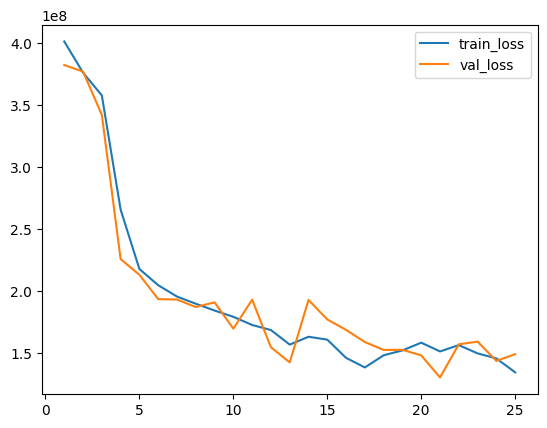

In [9]:
model11=Sequential()

model11.add(Dense(120,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-1
model11.add(Dense(100,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-2
model11.add(Dense(80,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-3
model11.add(Dense(60,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-4
model11.add(Dense(30,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-5
model11.add(Dense(10,input_shape=(x1_new_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #layer-6
model11.add(Dense(1)) #output layer

model11.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error','root_mean_squared_error'])

model11.summary()

result11=model11.fit(x1_train,y1_train,epochs=25,validation_split=0.2,batch_size=32)

result11_df11=pd.DataFrame(result11.history)

plt.plot(range(1,26),result11_df11['loss'],label="train_loss")
plt.plot(range(1,26),result11_df11['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [10]:
#Prediction
y1_pred=model11.predict(x1_test)
#Evaluation
MAE=mean_absolute_error(y1_test,y1_pred)
MSE=mean_squared_error(y1_test,y1_pred)
RMSE=np.sqrt(MSE)
R2=r2_score(y1_test,y1_pred)
#print the evaluation metrics
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2: {R2}")

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
MAE: 6634.004004177502
MSE: 156739302.44866088
RMSE: 12519.55679921062
R2: 0.6994285308494561


In [11]:
model11.save("Retail_NPmodel.h5")

In [12]:
with open ("scaler1.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [13]:
# Load the model with custom objects
load_model = load_model("D:/Final Project/Retail-Sales-Markdown-Prediction-Using-ANN-with-TensorFlow--AWS-Deployment/Retail_NPmodel.h5", 
                        custom_objects={'LeakyReLU': LeakyReLU})

In [14]:
with open("scaler1.pkl", "rb") as file:
    scaler = pickle.load(file)

In [16]:
loaded_model.predict(x1_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


array([[50049.434 ],
       [ 2541.1074],
       [ 3804.8545],
       ...,
       [10508.554 ],
       [13076.446 ],
       [39575.27  ]], dtype=float32)

In [22]:
user_input=np.array([[1,1,151315,1,0,42.31,2.572,211.096358,8.106,5,5,2,2010]])
scaled_input=scaler.transform(user_input)
predict=loaded_model.predict(scaled_input)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\K R Bharath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[31444.576]], dtype=float32)